In [33]:
import numpy as np
import pandas as pd
import folium # For plotting maps
import re
import geopandas # For working with geographical data
import matplotlib  # For plotting in python
import matplotlib.pyplot as plt
import urllib.request, json 

In [2]:
def live_url_req():
        with urllib.request.urlopen("https://api.covid19india.org/state_district_wise.json") as url:
            df_district_wise_case = json.loads(url.read().decode())['West Bengal']['districtData']
            return df_district_wise_case
df_district_wise_case = live_url_req()
def district_wise_case():
    df_district_wise_case = live_url_req()
    state_district_wise_case = pd.DataFrame()
    for key, value in df_district_wise_case.items():
        for k, v in value.items():
            if k == 'confirmed':
                temp_1 = pd.DataFrame({"Cases":[v],"District":[key], })
                state_district_wise_case = state_district_wise_case.append(temp_1)
    state_district_wise_case. sort_values(by='Cases' , ascending= False, inplace=True)
    state_district_wise_case = state_district_wise_case.reset_index(drop=True)
    return state_district_wise_case
state_district_wise_case = district_wise_case()
table_data_1 = []
for i in range(int(state_district_wise_case.shape[0])):
    temp = state_district_wise_case.iloc[i]
    table_data_1.append(dict(temp))

In [3]:
state_district_wise_case

,Cases,District
0,128089,Kolkata
1,122030,North 24 Parganas
2,37009,South 24 Parganas
3,35573,Howrah
4,29472,Hooghly
5,22543,Nadia
6,20613,Purba Medinipur
7,20177,Paschim Medinipur
8,18343,Darjeeling
9,16236,Paschim Bardhaman


In [4]:
df2 = {'Cases': state_district_wise_case.at[12,'Cases']+state_district_wise_case.at[9,'Cases'],'District': 'Barddhaman'}
state_district_wise_case = state_district_wise_case.append(df2, ignore_index = True)
state_district_wise_case

,Cases,District
0,128089,Kolkata
1,122030,North 24 Parganas
2,37009,South 24 Parganas
3,35573,Howrah
4,29472,Hooghly
5,22543,Nadia
6,20613,Purba Medinipur
7,20177,Paschim Medinipur
8,18343,Darjeeling
9,16236,Paschim Bardhaman


In [5]:
state_district_wise_case.at[12,'Cases']+state_district_wise_case.at[9,'Cases']

28860

In [6]:
west_bengal_geojson=geopandas.read_file('/Users/amiksen/Downloads/GitHub/PDS-Website/static/IndiaStateTopojsonFiles-master/WestBengal.geojson')
west_bengal_geojson

,REMARKS_2,Country,State_Name,State_Code,Dist_Name,Dist_Code,geometry
0,None,India,West Bengal,19,Bankura,339,"POLYGON ((86.89942 23.63156, 86.91116 23.62734..."
1,None,India,West Bengal,19,Barddhaman,335,"POLYGON ((87.77013 22.96356, 87.76780 22.95902..."
2,None,India,West Bengal,19,Birbhum,334,"POLYGON ((87.79505 24.57967, 87.79890 24.57781..."
3,None,India,West Bengal,19,Dakshin Dinajpur,331,"POLYGON ((88.27687 25.31151, 88.27431 25.31419..."
4,None,India,West Bengal,19,Darjeeling,327,"POLYGON ((88.48163 26.85117, 88.47404 26.84632..."
5,None,India,West Bengal,19,Purba Medinipur,345,"MULTIPOLYGON (((88.14139 22.02639, 88.14250 22..."
6,None,India,West Bengal,19,Howrah,341,"MULTIPOLYGON (((87.92568 22.42483, 87.92539 22..."
7,None,India,West Bengal,19,Hooghly,338,"POLYGON ((87.77013 22.96356, 87.77180 22.96441..."
8,None,India,West Bengal,19,Cooch Behar,329,"MULTIPOLYGON (((88.78070 26.16367, 88.78605 26..."
9,None,India,West Bengal,19,Kolkata,342,"POLYGON ((88.27065 22.55176, 88.27801 22.54965..."


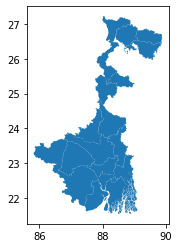

In [7]:
west_bengal_geojson.plot()

In [8]:
fig=plt.figure(figsize=(850,1000))
m = folium.Map([22.9868,87.8550], tiles='cartodbpositron', zoom_start=7)
folium.Choropleth(
    geo_data=west_bengal_geojson,
    name="choropleth",
    data=state_district_wise_case,
    columns=["District", "Cases"],
    key_on="feature.properties.Dist_Name",
    fill_color="YlGn",
    fill_opacity=0.5,
    line_opacity=0.2,
    legend_name="Active covid cases",
).add_to(m)

folium.LayerControl().add_to(m)
m.save(outfile='map.html')

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fe29f63fef0> (for post_execute):


ValueError: Image size of 61200x72000 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 61200x72000 with 0 Axes>

In [20]:
location = 'Bankura'
state = 'West Bengal'
location_df = pd.read_excel('/Users/amiksen/Downloads/GitHub/PDS-Website/pds/Data_files and other codes/District Lat Long/'+state+'_District_lat_long.xlsx')
location_df
location_cor = location_df.loc[location_df['District'] == location]
location_cor = location_cor.drop(['District'], axis = 1)
location_cor = location_cor.values.tolist()
location_cor[0]
fps_data = pd.read_excel('/Users/amiksen/Downloads/GitHub/PDS-Website/pds/Data_files and other codes/FPS/'+state+'/Fps_'+location+'.xlsx')
fps_map_data = fps_data.loc[:,['lat','long']]
fps_map_data = fps_map_data.dropna(subset = ['lat'], inplace=False)
fps_location = fps_map_data.values.tolist()
fps_map = folium.Map(location=location_cor[0],tiles='cartodbpositron',zoom_start=9.5)
for point in range(0, len(fps_location)):
    folium.Marker(fps_location[point], popup=fps_data['FPS Code'][point], icon=folium.Icon(color='darkred', icon_color='white', icon='building', angle=0, prefix='fa')).add_to(fps_map)
fps_map

In [10]:
wholesaler_data = pd.read_excel('/Users/amiksen/Downloads/GitHub/PDS-Website/pds/Data_files and other codes/Wholesalers/West Bengal/wholesaler_'+location+'.xlsx')
wholesaler_map_data = wholesaler_data.loc[:,['lat','long']]
wholesaler_map_data = wholesaler_map_data.dropna(subset = ['lat'], inplace=False)
wholesaler_location = wholesaler_map_data.values.tolist()
wholesaler_map = folium.Map(location=location_cor[0],tiles='cartodbpositron',zoom_start=10)
for point in range(0, len(wholesaler_location)):
    folium.Marker(wholesaler_location[point], popup=location, icon=folium.Icon(color='green', icon_color='white', icon='truck', angle=0, prefix='fa')).add_to(wholesaler_map)
wholesaler_map

In [11]:
fps_location[22]

[24.2933362, 88.4372032]

In [12]:
wholesaler_data

,Wholesaler Name,Phone No._x,Mobile No._x,Address_x,Pin_x,Valid from_x,Valid To_x,Sub-Division Name_x,Unnamed: 0,Phone No._y,...,Valid from_y,Valid To_y,Sub-Division Name_y,Shop Address,Village Name,Full_Address,Url,Url_With_Coordinates,lat,long
0,Ajit Kumar Dhak,NaN,9474497580,"Polba, Hooghly.",NaN,2003-01-01,2020-12-31,Chinsura (Sadar),0,NaN,...,2003-01-01,2020-12-31,Chinsura (Sadar),"Polba, Hooghly.",Chinsura (Sadar),"Polba, Hooghly., Chinsura (Sadar)","https://www.google.com/maps/search/Polba, Hoog...",NaN,22.902745,88.389733
1,Amulya Charan Sadhukhan Ganesh Chandra Sadhukhan,3.212255e+09,9434015698,Pursura,712401.0,2003-01-01,2014-12-31,Arambag,1,3.212255e+09,...,2003-01-01,2014-12-31,Arambag,Pursura,Arambag,"Pursura, Arambag","https://www.google.com/maps/search/Pursura, Ar...",https://maps.google.com/maps/api/staticmap?cen...,22.838962,87.961650
2,Amulya Charan Sadhukhan Ganesh Chandra Sadhukh...,3.212255e+09,9434015698,"Chilladangi, Pursura.",712401.0,2003-01-01,2014-12-31,Arambag,2,3.212255e+09,...,2003-01-01,2014-12-31,Arambag,"Chilladangi, Pursura.",Arambag,"Chilladangi, Pursura., Arambag",https://www.google.com/maps/search/Chilladangi...,https://maps.google.com/maps/api/staticmap?cen...,22.805667,87.940353
3,Bappaditya Sen,3.212255e+09,9434102499,"VillPost- Champadanga, Tarakeswar, Hooghly.",712401.0,2018-02-09,2020-12-31,Chandannagar,3,3.212255e+09,...,2018-02-09,2020-12-31,Chandannagar,"VillPost- Champadanga, Tarakeswar, Hooghly.",Chandannagar,"VillPost- Champadanga, Tarakeswar, Hooghly., C...",https://www.google.com/maps/search/VillPost- C...,https://maps.google.com/maps/api/staticmap?cen...,22.861636,88.368428
4,Bibekananda Sen,3.212255e+08,9476121132,"Champadanga, Tarakeswar",712401.0,2003-01-01,2014-12-31,Chandannagar,4,3.212255e+08,...,2003-01-01,2014-12-31,Chandannagar,"Champadanga, Tarakeswar",Chandannagar,"Champadanga, Tarakeswar, Chandannagar",https://www.google.com/maps/search/Champadanga...,https://maps.google.com/maps/api/staticmap?cen...,22.859243,88.176688
5,Deb Kumar Kundu,3.213229e+08,9932230648,"Talchinan, P.O. Puinan, P.S. Dadpur.",NaN,2003-01-01,2020-12-31,Chinsura (Sadar),5,3.213229e+08,...,2003-01-01,2020-12-31,Chinsura (Sadar),"Talchinan, P.O. Puinan, P.S. Dadpur.",Chinsura (Sadar),"Talchinan, P.O. Puinan, P.S. Dadpur., Chinsura...","https://www.google.com/maps/search/Talchinan, ...",https://maps.google.com/maps/api/staticmap?cen...,22.996030,88.330476
6,Debesh Prasad Bhagat,NaN,8017483615,"Bandel Bazar, Debanandapur Gram Panchayat.",NaN,2003-01-01,2020-12-31,Chinsura (Sadar),6,NaN,...,2003-01-01,2020-12-31,Chinsura (Sadar),"Bandel Bazar, Debanandapur Gram Panchayat.",Chinsura (Sadar),"Bandel Bazar, Debanandapur Gram Panchayat., Ch...",https://www.google.com/maps/search/Bandel Baza...,https://maps.google.com/maps/api/staticmap?cen...,22.930444,88.370450
7,Dhirendra Chandra Biswas,3.213260e+08,9434619362,"Jirat, P.S. Balagarh.",NaN,2003-01-01,2020-12-31,Chinsura (Sadar),7,3.213260e+08,...,2003-01-01,2020-12-31,Chinsura (Sadar),"Jirat, P.S. Balagarh.",Chinsura (Sadar),"Jirat, P.S. Balagarh., Chinsura (Sadar)","https://www.google.com/maps/search/Jirat, P.S....",https://maps.google.com/maps/api/staticmap?cen...,22.989936,88.422148
8,Dilip Kumar Mandal,3.212276e+08,9831297349,Tarakeswar,712410.0,2003-01-01,2020-12-31,Chandannagar,8,3.212276e+08,...,2003-01-01,2020-12-31,Chandannagar,Tarakeswar,Chandannagar,"Tarakeswar, Chandannagar","https://www.google.com/maps/search/Tarakeswar,...",https://maps.google.com/maps/api/staticmap?cen...,22.881538,88.012805
9,Dinesh Kumar Periwal,2.684628e+07,9831269020,"P.O. P.S. Mogra, Hooghly.",712148.0,2015-09-02,2020-12-31,Chinsura (Sadar),9,2.684628e+07,...,2015-09-02,2020-12-31,Chinsura (Sadar),"P.O. P.S. Mogra, Hooghly.",Chinsura (Sadar),"P.O. P.S. Mogra, Hooghly., Chinsura (Sadar)",https://www.google.com/maps/search/P.O. P.S. M...,https://maps.google.com/maps/api/staticmap?cen...,22.982366,88.375932


In [13]:
demand = pd.read_excel('/Users/amiksen/Downloads/GitHub/PDS-Website/pds/Data_files and other codes/Demand/'+state+'/'+location+'.xlsx')
label = demand['Date']
label = label.to_list()
for i in range(len(label)):
    label[i] = label[i].date()
label
demand_r = demand['Demand_Rice'].to_list()
demand_r

[21477894,
 19487812,
 24434062,
 14137666,
 3844166,
 21031839,
 9063533,
 7139926,
 9439008,
 20434817,
 6993835,
 13632266,
 44305,
 14976984,
 25028589,
 3137904,
 5149250,
 712496,
 10129825,
 22739773,
 12534439,
 15566437,
 8447995,
 16656546]

In [14]:
demand

,Date,Demand_Rice,Demand_Wheat,Demad_Sugar
0,2020-01-15,21477894,37909133,801346
1,2020-02-15,19487812,8263773,3058422
2,2020-03-15,24434062,27909286,904341
3,2020-04-15,14137666,35709197,3365340
4,2020-05-15,3844166,25412836,1679046
5,2020-06-15,21031839,20070168,368882
6,2020-07-15,9063533,40583123,2118618
7,2020-08-15,7139926,40042862,3116310
8,2020-09-15,9439008,51416932,1692126
9,2020-10-15,20434817,29200380,2518934


In [18]:
location_df['District']

['Bankura',
 'Barddhaman',
 'Birbhum',
 'Dakshin Dinajpur',
 'Darjeeling',
 'Purba Medinipur',
 'Howrah',
 'Hooghly',
 'Cooch Behar',
 'Kolkata',
 'Malda',
 'Murshidabad',
 'Nadia',
 'Purulia',
 'South 24 Parganas',
 'Paschim Medinipur',
 'Alipurduar',
 'Uttar Dinajpur',
 'Jalpaiguri',
 'North 24 Parganas']

In [22]:
visual={"data":location_df['District'].tolist()}
visual

{'data': ['Bankura',
  'Barddhaman',
  'Birbhum',
  'Dakshin Dinajpur',
  'Darjeeling',
  'Purba Medinipur',
  'Howrah',
  'Hooghly',
  'Cooch Behar',
  'Kolkata',
  'Malda',
  'Murshidabad',
  'Nadia',
  'Purulia',
  'South 24 Parganas',
  'Paschim Medinipur',
  'Alipurduar',
  'Uttar Dinajpur',
  'Jalpaiguri',
  'North 24 Parganas']}

In [23]:
visual['data']

['Bankura',
 'Barddhaman',
 'Birbhum',
 'Dakshin Dinajpur',
 'Darjeeling',
 'Purba Medinipur',
 'Howrah',
 'Hooghly',
 'Cooch Behar',
 'Kolkata',
 'Malda',
 'Murshidabad',
 'Nadia',
 'Purulia',
 'South 24 Parganas',
 'Paschim Medinipur',
 'Alipurduar',
 'Uttar Dinajpur',
 'Jalpaiguri',
 'North 24 Parganas']

In [24]:
for case in visual['data']:
    print(case

Bankura
Barddhaman
Birbhum
Dakshin Dinajpur
Darjeeling
Purba Medinipur
Howrah
Hooghly
Cooch Behar
Kolkata
Malda
Murshidabad
Nadia
Purulia
South 24 Parganas
Paschim Medinipur
Alipurduar
Uttar Dinajpur
Jalpaiguri
North 24 Parganas


In [30]:
choices = []
for d in visual['data']:
    temp_tupple = []
    temp_tupple.append(d)
    temp_tupple.append(d)
    choices.append(tuple(temp_tupple))
choices

[('Bankura', 'Bankura'),
 ('Barddhaman', 'Barddhaman'),
 ('Birbhum', 'Birbhum'),
 ('Dakshin Dinajpur', 'Dakshin Dinajpur'),
 ('Darjeeling', 'Darjeeling'),
 ('Purba Medinipur', 'Purba Medinipur'),
 ('Howrah', 'Howrah'),
 ('Hooghly', 'Hooghly'),
 ('Cooch Behar', 'Cooch Behar'),
 ('Kolkata', 'Kolkata'),
 ('Malda', 'Malda'),
 ('Murshidabad', 'Murshidabad'),
 ('Nadia', 'Nadia'),
 ('Purulia', 'Purulia'),
 ('South 24 Parganas', 'South 24 Parganas'),
 ('Paschim Medinipur', 'Paschim Medinipur'),
 ('Alipurduar', 'Alipurduar'),
 ('Uttar Dinajpur', 'Uttar Dinajpur'),
 ('Jalpaiguri', 'Jalpaiguri'),
 ('North 24 Parganas', 'North 24 Parganas')]

In [31]:
len(demand)

24

In [45]:
import os
demand = pd.read_excel('/Users/amiksen/Downloads/GitHub/PDS-Website/pds/Data_files and other codes/Demand/West Bengal/Bankura.xlsx')
demand
data = {}
for i in range(0,len(demand)):
    label =  demand['Date'][i]
    Demand = demand['Demand_Rice'][i]
    data[label]=Demand

In [44]:
txt = demand['Date'][1]
txt

Timestamp('2020-02-15 00:00:00')

In [46]:
data

{Timestamp('2020-01-15 00:00:00'): 21477894,
 Timestamp('2020-02-15 00:00:00'): 19487812,
 Timestamp('2020-03-15 00:00:00'): 24434062,
 Timestamp('2020-04-15 00:00:00'): 14137666,
 Timestamp('2020-05-15 00:00:00'): 3844166,
 Timestamp('2020-06-15 00:00:00'): 21031839,
 Timestamp('2020-07-15 00:00:00'): 9063533,
 Timestamp('2020-08-15 00:00:00'): 7139926,
 Timestamp('2020-09-15 00:00:00'): 9439008,
 Timestamp('2020-10-15 00:00:00'): 20434817,
 Timestamp('2020-11-15 00:00:00'): 6993835,
 Timestamp('2020-12-15 00:00:00'): 13632266,
 Timestamp('2021-01-15 00:00:00'): 44305,
 Timestamp('2021-02-15 00:00:00'): 14976984,
 Timestamp('2021-03-15 00:00:00'): 25028589,
 Timestamp('2021-04-15 00:00:00'): 3137904,
 Timestamp('2021-05-15 00:00:00'): 5149250,
 Timestamp('2021-06-15 00:00:00'): 712496,
 Timestamp('2021-07-15 00:00:00'): 10129825,
 Timestamp('2021-08-15 00:00:00'): 22739773,
 Timestamp('2021-09-15 00:00:00'): 12534439,
 Timestamp('2021-10-15 00:00:00'): 15566437,
 Timestamp('2021-11-15